# Solar Power Generation Exploratory Analysis

#### Prepared By: Ben Chamblee -  https://github.com/Bench-amblee

## Contents:

* [Introduction](#Introduction)   
* [Imports](#Imports)   
* [Objectives](#Objectives)
     
     
* [Dataset 1: Gandikota](#Gandikota)      
     * [Plant Averages](#Gandikota_Average)   
     * [Weather Relatipnships](#Gandikota_Weather)    
     * [Temperature Relationships](#Gandikota_Temperature)    
     * [Nominal Operating Cell Temperature](#Gandikota_NOCT)    
      
      
* [Dataset 2: Nashik](#Nashik)      
     * [Plant Averages](#Nashik_Average)    
     * [Weather Relatipnships](#Nashik_Weather)    
     * [Nominal Operating Cell Temperature](#Nashik_NOCT)    
     
     
* [Conclusion](#Conclusion)

## Introduction<a id='Introduction'></a>
Now that we have cleaned up our data we can take a look at some of the relationships between varaibles. It's important to find patterns so that we can make a solid analysis and provide relevant information from this data.

In the last step we combined the weather data with the power generation data for each of the two solar plants. A few columns needed to be dropped in order to make the data easier to work with but this should have very little impact on our analysis. The next step is to get a better idea of what we're working with.

## Imports<a id='Imports'></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

gandikota = pd.read_csv('Data/Plant1_Data_Cleaned.csv')
nashik = pd.read_csv('Data/Plant2_Data_Cleaned.csv')


## Objectives<a id='Objectives'></a>
We want to try to better understand the relationships wihin our data's variables. To do this we'll have to: 

- Build data profiles, tables, and visualizations
- Explore data relationships using statistical analysis
- Select important/interesting features

# Dataset 1: Gandikota<a id='Gandikota'></a>
To start off we're going to take a look at one of the two solar power plants, the one located in Gandikota, India. While these datasets are similar in structure the data is likely not similar at all. Some methods may be applicable for both datasets but we don't want to assume that both are the same.

In [3]:
gandikota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68774 entries, 0 to 68773
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             68774 non-null  int64  
 1   Date_Time              68774 non-null  object 
 2   Plant_ID               68774 non-null  float64
 3   Array_Source_Key       68774 non-null  object 
 4   DC_Power_kW            68774 non-null  float64
 5   AC_Power_kW            68774 non-null  float64
 6   Daily_Yield_kW         68774 non-null  float64
 7   Total_Yield_kW         68774 non-null  float64
 8   Date                   68774 non-null  object 
 9   Sensor_Source_Key      68774 non-null  object 
 10  Ambient_Temperature_C  68774 non-null  float64
 11  Module_Temperature_C   68774 non-null  float64
 12  Irradition             68774 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 6.8+ MB


In [4]:
gandikota.head()

,Unnamed: 0,Date_Time,Plant_ID,Array_Source_Key,DC_Power_kW,AC_Power_kW,Daily_Yield_kW,Total_Yield_kW,Date,Sensor_Source_Key,Ambient_Temperature_C,Module_Temperature_C,Irradition
0,0,2020-05-15 00:00:00,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,1,2020-05-15 00:00:00,4135001.0,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020-05-15,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2,2,2020-05-15 00:00:00,4135001.0,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,2020-05-15,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
3,3,2020-05-15 00:00:00,4135001.0,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,2020-05-15,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
4,4,2020-05-15 00:00:00,4135001.0,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,2020-05-15,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0


There are 22 total solar arrays, lets take a look at how much each individual array generates each day by taking the 'Daily_Yield' value at 23:45:00 Pm

In [5]:
daily_total = gandikota
daily_total.set_index('Date_Time',inplace=True)
daily_total.index = pd.to_datetime(daily_total.index)

match_timestamp = "23:45:00"
daily_total = daily_total.loc[daily_total.index.strftime("%H:%M:%S") == match_timestamp]

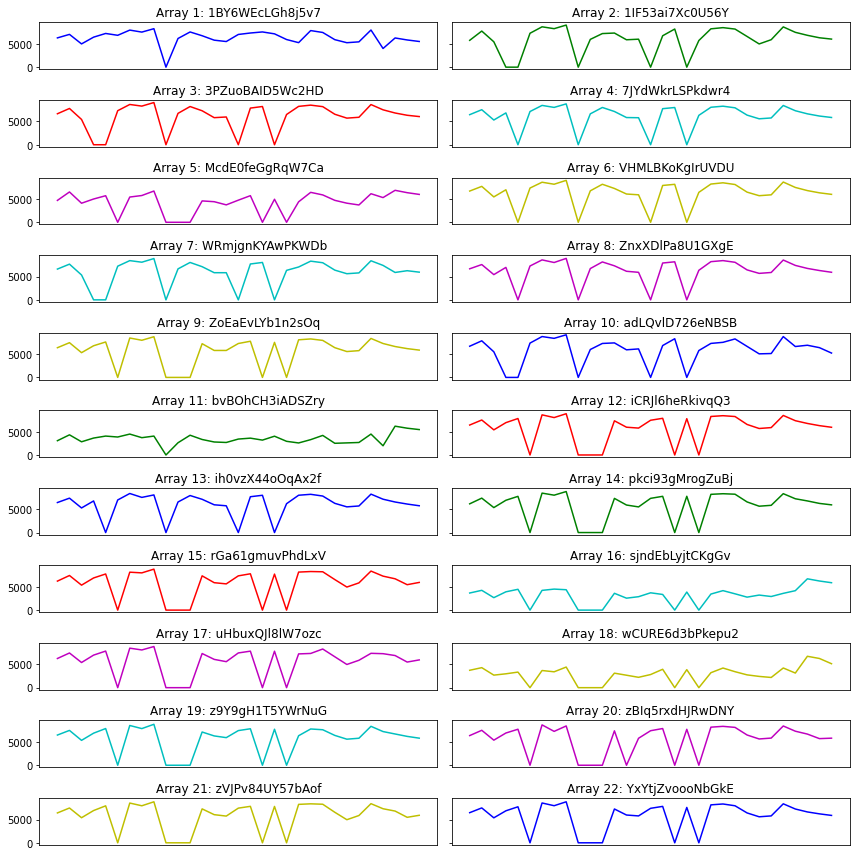

In [6]:
fig,ax = plt.subplots(11,2,sharex=True,sharey=True,figsize=(12,12))
colors = ['b','g','r','c','m','y','c','m','y','b','g','r','b','g','r','c','m','y','c','m','y','b','g']
def array_performance(data):
    for label,i in enumerate(data['Array_Source_Key'].unique()):
        a = i
        z = daily_total.loc[daily_total['Array_Source_Key'] == a]
        y = z['Daily_Yield_kW']
        x = z['Date']
        axs = ax.flatten()[label]
        axs.plot(x,y,color=colors[label])
        title = ('Array '+str(label+1) + ': ' + str(a))
        axs.set_title(title)
        axs.set_xticks([])
        fig.tight_layout()
    
array_performance(gandikota)

As we can see by the figure above, there are lots of inconsistencies between each array. This could be due to a number of reasons: malfunctioning, shade or obstructed sunlight, dust, etc. 

Now lets get an average for the plant as a whole

In [7]:
daily_averages = {}
for index, i in enumerate(daily_total['Array_Source_Key'].unique()):
    a = daily_total.loc[daily_total['Array_Source_Key'] == i]
    avg = (a['Total_Yield_kW'][-1] - a['Total_Yield_kW'][0])/((len(daily_total)/(len(daily_total['Array_Source_Key'].unique()))))
    daily_averages[index+1] = avg
daily_averages

{1: 6894.0,
 2: 7644.258064516129,
 3: 7636.645161290323,
 4: 7460.774193548387,
 5: 7631.1612903225805,
 6: 7639.612903225807,
 7: 7487.1612903225805,
 8: 7506.774193548387,
 9: 7599.5161290322585,
 10: 7451.903225806452,
 11: 7744.032258064516,
 12: 6785.8387096774195,
 13: 7594.032258064516,
 14: 7365.129032258064,
 15: 7541.290322580645,
 16: 7509.612903225807,
 17: 7486.064516129032,
 18: 7602.032258064516,
 19: 7520.354838709677,
 20: 7434.322580645161,
 21: 7458.677419354839,
 22: 7572.1612903225805}

Text(0.5, 1.0, 'Average Daily Power Generation')

Text(0, 0.5, 'Power (kW)')

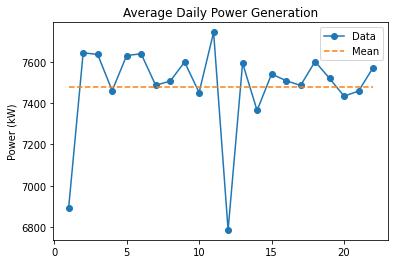

In [8]:
labels = []
sizes = []
for x, y in daily_averages.items():
    labels.append(x)
    sizes.append(y)
overall = sum(daily_averages.values())/22
mean = [overall]*22
#plt.plot(sizes,overall)
#plt.show()

fig,ax = plt.subplots()
x = np.arange(1,23,1)
y = sizes
data_line = ax.plot(x,y,label='Data', marker='o')

mean_line = ax.plot(x,mean, label='Mean', linestyle='--')
legend = ax.legend(loc='upper right')
plt.title('Average Daily Power Generation')
plt.ylabel('Power (kW)')
plt.show()

Other than arrays 1 and 12, each array seems to be performing at or above the plant's average

Let's see if we can find out why

## Creating a Plant-Wide Average for Each Variable<a id='Gandikota_Average'></a>

Before we can figure out what the issue with arrays 1 and 12 are we should first compute the averages for every category in the dataset. Including:

- DC_Power
- AC_Power
- Daily_Yield
- Ambient_Temperature
- Module_Temperature
- Irradation

First we need to make this new dataframe, lets start with an empty dictionary

In [9]:
# step 1: turn empty dictionary into df

gandikota_averages = {}
num_arrays = 22
for times in gandikota.index.unique():
    x = gandikota.loc[gandikota.index == times]
    y = x['DC_Power_kW'].sum()/num_arrays
    gandikota_averages[times] = y
    
gandikota_averages = pd.DataFrame.from_dict(gandikota_averages, orient='index')
gandikota_averages = gandikota_averages.rename(columns={0:'DC_Power_kW'})

# step 2: add the other variables
ac = []
dy = []
at = []
mt = []
ir = []
for i,times in enumerate(gandikota.index.unique()):
    a = 'AC_Power_kW'
    b = 'Daily_Yield_kW'
    c = 'Ambient_Temperature_C'
    d = 'Module_Temperature_C'
    e = 'Irradition'
    x = x = gandikota.loc[gandikota.index == times]
    ac.append(x[a].sum()/num_arrays)
    dy.append(x[b].sum()/num_arrays)
    at.append(x[c].sum()/num_arrays)
    mt.append(x[d].sum()/num_arrays)
    ir.append(x[e].sum()/num_arrays)

gandikota_averages[a] = ac
gandikota_averages[b] = dy
gandikota_averages[c] = at
gandikota_averages[d] = mt
gandikota_averages[e] = ir

gandikota_averages.head()

,DC_Power_kW,AC_Power_kW,Daily_Yield_kW,Ambient_Temperature_C,Module_Temperature_C,Irradition
2020-05-15 00:00:00,0.0,0.0,0.0,24.039574,21.818530,0.0
2020-05-15 00:15:00,0.0,0.0,0.0,23.944380,21.727047,0.0
2020-05-15 00:30:00,0.0,0.0,0.0,23.802309,21.565383,0.0
2020-05-15 00:45:00,0.0,0.0,0.0,23.716761,21.344450,0.0
2020-05-15 01:00:00,0.0,0.0,0.0,24.621525,22.165423,0.0


<AxesSubplot:title={'center':'Array 1 Performance vs Solar Plant Average'}>

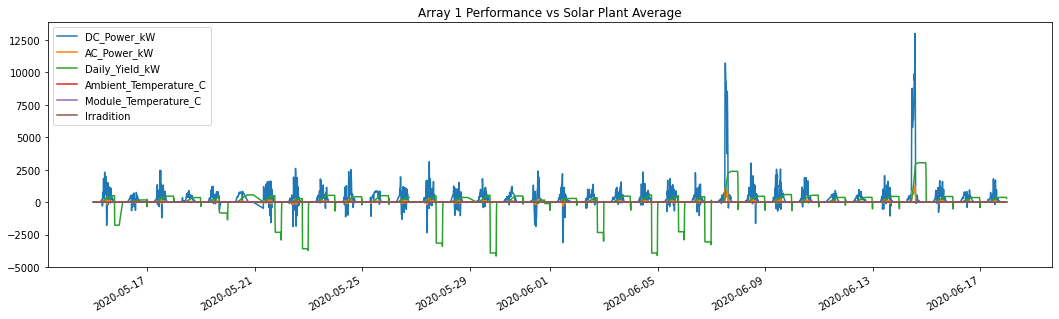

In [10]:
array_1 = gandikota.loc[gandikota['Array_Source_Key'] == gandikota['Array_Source_Key'].iloc[0]]
array_1comp = array_1[['DC_Power_kW','AC_Power_kW','Daily_Yield_kW','Ambient_Temperature_C',
                       'Module_Temperature_C','Irradition']]
df_1 = gandikota_averages - array_1comp
df_1.plot(title=('Array 1 Performance vs Solar Plant Average'),figsize=(18,5))

There are a few things that stand out here but lets take a closer look at each variable to see if we can find anything

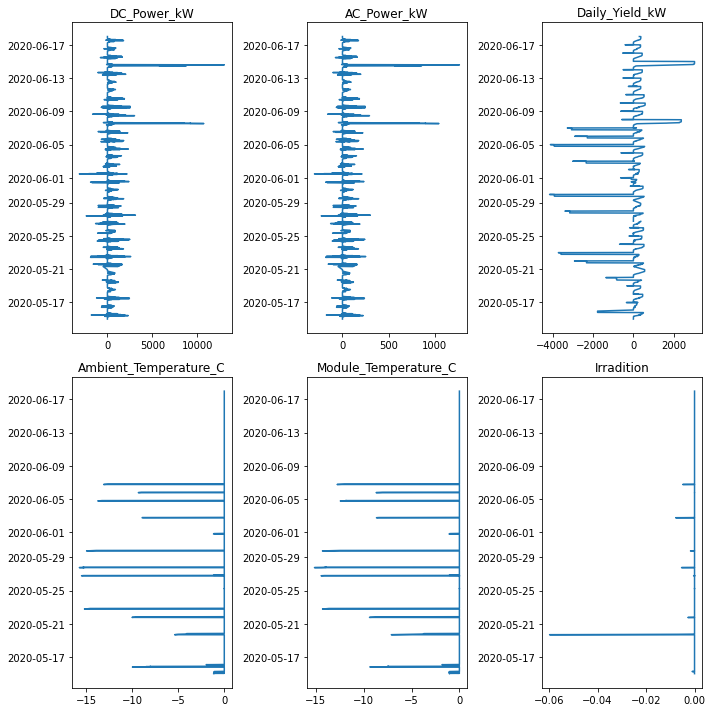

In [11]:
fig,ax = plt.subplots(2,3,figsize=(10,10))
feature_list = ['DC_Power_kW','AC_Power_kW','Daily_Yield_kW','Ambient_Temperature_C',
                       'Module_Temperature_C','Irradition']
def subplots(data):
    for index, feat in enumerate(feature_list):
        x = data[feat]
        y = data.index
        axs = ax.flatten()[index]
        axs.plot(x,y)
        title = (str(feat))
        axs.set_title(title)
        fig.tight_layout()
    plt.show()
subplots(df_1)

From here we can see something that might already seem obvious: as temperature dips as does the power output of the array.

There is one part that seems out of the ordinary though, around the 2020-06-13 date we can see a huge spike in DC_Power but no difference at all in Temperature. This could also be a result of other array's underperforming though.

<AxesSubplot:title={'center':'Array 12 Performance vs Solar Plant Average'}>

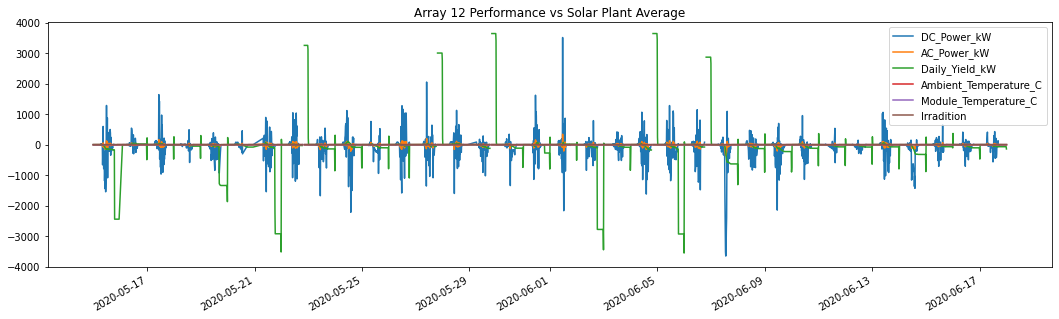

In [12]:
array_12 = gandikota.loc[gandikota['Array_Source_Key'] == gandikota['Array_Source_Key'].iloc[11]]
array_12comp = array_12[['DC_Power_kW','AC_Power_kW','Daily_Yield_kW','Ambient_Temperature_C',
                       'Module_Temperature_C','Irradition']]
df_12 = gandikota_averages - array_12comp
df_12.plot(title=('Array 12 Performance vs Solar Plant Average'),figsize=(18,5))

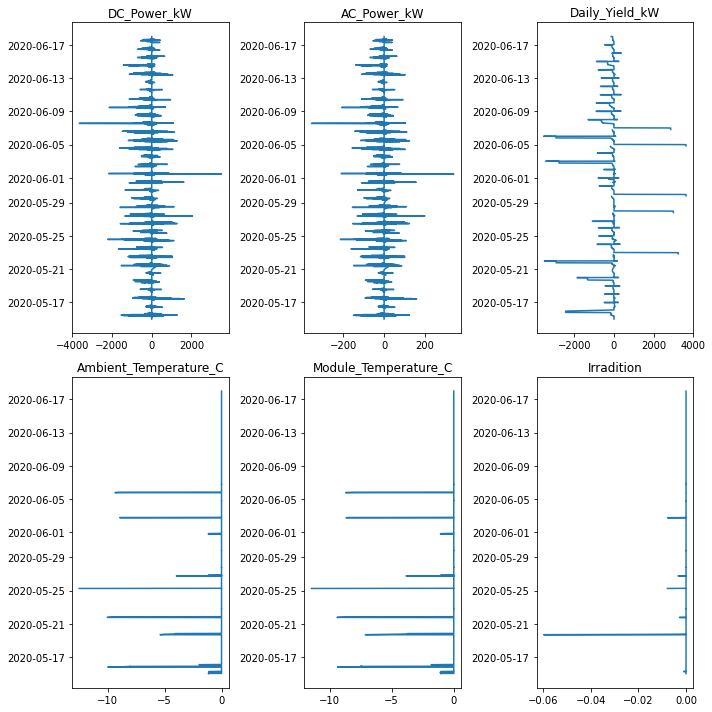

In [13]:
fig,ax = plt.subplots(2,3,figsize=(10,10))

def subplots(data):
    for index, feat in enumerate(feature_list):
        x = data[feat]
        y = data.index
        axs = ax.flatten()[index]
        axs.plot(x,y)
        title = (str(feat))
        axs.set_title(title)
        fig.tight_layout()
    plt.show()
subplots(df_12)

Nothing in particular stands out here either, it looks like Arrays 1 and 12 underperform mostly due to more instances of lower temperatures. This could be for a number of reasons, however to fix this moving forward it might be a good idea to create a cutoff percentage to make sure the team can identify malfunctioning arrays quicker.

## Finding the Relationships in Weather Variables<a id='Gandikota_Weather'></a>

This is a critical first step if we want to be able to predict the array's performance in the future. Understanding how a 1 degree difference in the ambient temperature impacts the module's temperature will allow us to calculate how much power an array should generate given certain weather conditions.

Text(0.5, 1.0, 'Ambient Temperature vs Array Temperature')

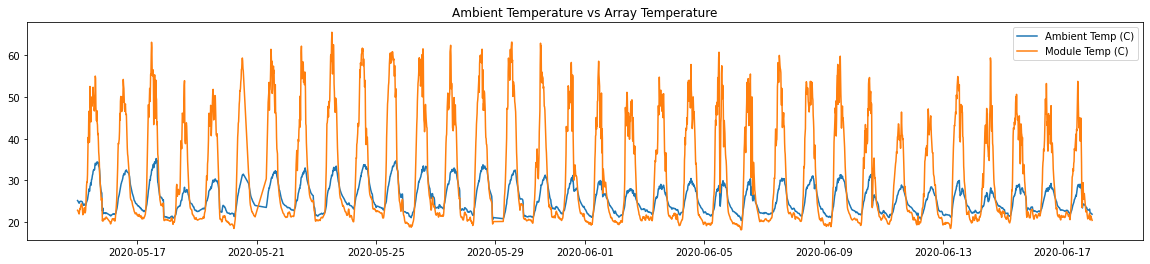

In [14]:
g_weather = gandikota['Ambient_Temperature_C']
m_temp = gandikota['Module_Temperature_C']
labels = ['Ambient Temp (C)','Module Temp (C)']
fig, ax = plt.subplots(1, 1, figsize = (20, 4))
plt.plot(g_weather)
plt.plot(m_temp)
plt.title('Ambient Temperature vs Array Temperature')
plt.legend(labels)
plt.show()

It looks like there's an exponential relationship between the temperature outside and the temperature of the arrays. As the temperature rises the panels' temperature rises even quicker and vice versa for when temperature falls.

I believe a more direct relationship should be seen between the solar irradiance and the array's temperatures

Text(0.5, 1.0, 'Solar Irradiance vs Array Temperature')

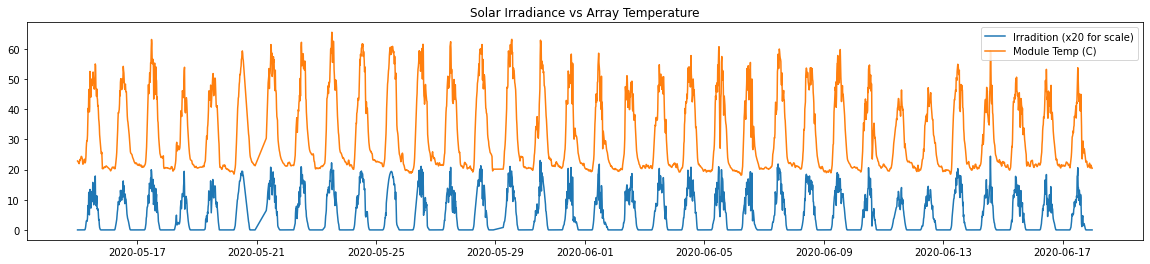

In [15]:
g_irradition = gandikota['Irradition']
m_temp = gandikota['Module_Temperature_C']
labels = ['Irradition (x20 for scale)','Module Temp (C)']
fig, ax = plt.subplots(1, 1, figsize = (20, 4))
plt.plot(g_irradition*20)
plt.plot(m_temp)
plt.title('Solar Irradiance vs Array Temperature')
plt.legend(labels)
plt.show()

Let's generate a heatmap to find which variables have the highest correlation with each other

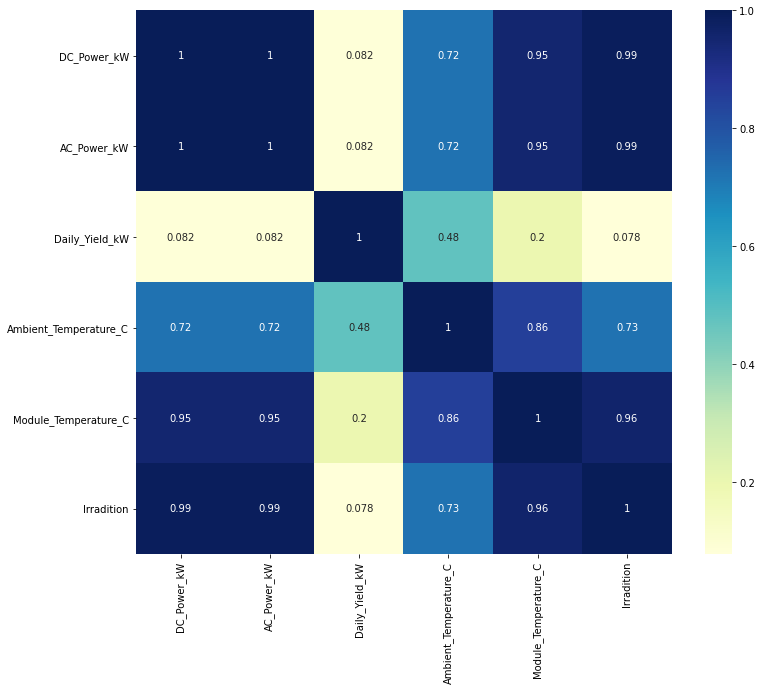

In [16]:
power_and_temps = gandikota[['DC_Power_kW','AC_Power_kW','Daily_Yield_kW',
                             'Ambient_Temperature_C','Module_Temperature_C','Irradition']]
plt.subplots(figsize=(12,10))
sns.heatmap(power_and_temps.corr(),annot=True,cmap='YlGnBu');

We can see very stron correlation with irradiation and module temperature. We should try to get a better idea of how Module Temperature is calculated before we figure out how to predict power generation.

## Ambient Temperature and Module Temperature<a id='Gandikota_Temperature'></a>

In [17]:
temp_data = gandikota_averages[['Ambient_Temperature_C','Module_Temperature_C','Irradition']]
temp_data.loc[temp_data['Irradition']>0].head()

,Ambient_Temperature_C,Module_Temperature_C,Irradition
2020-05-15 05:45:00,23.185156,22.046842,0.000824
2020-05-15 06:00:00,22.993517,21.197359,0.005619
2020-05-15 06:15:00,22.920197,21.337392,0.021269
2020-05-15 06:30:00,23.976731,22.893282,0.049410
2020-05-15 06:45:00,24.218990,24.442444,0.095394


To calculate the temperature of each module, we'll first have to figure out the Nominal Operating Cell Temperature(NOCT) which represents the temperature of the call at 'normal' conditions. Normal conditions, in this case, being:

- Irradiance of 0.8
- Ambient Temperature of 20 degrees C
- Wind Velocity of 1 m/s

Using NOCT we can calculate the expected temperature of a module using this equation:

![](images/NOCT_calculation.jpg)

- Note that S represents insolation which we can obtain by multiplying our current Irradiation values by 1000 because it's measured in mW/m^2 as opposed to W/m^2

You can read more about Nominal Operating Cell Temperature here: https://www.weamerisolar.eu/what-is-nominal-operating-cell-temperature/#:~:text=The%20formula%20that%20shows%20you,the%20insolation%20in%20mW%2Fcm2.

Now let's figure out our array's NOCT

In [18]:
#temp_data.loc[temp_data['Irradition'] > 0.5]
g_noct = []
for n in range(len(temp_data)):
    tc = temp_data['Module_Temperature_C'][n]
    ta = temp_data['Ambient_Temperature_C'][n]
    s = temp_data['Irradition'][n]
    if s > 0:
        x = (20*((s*1000)+4*ta - 4*tc))/(s*1000)
        g_noct.append(x)
g_noct = [x for x in g_noct if x < gandikota['Module_Temperature_C'].max()]
np.mean(g_noct)

18.351840029094472

18.35 is a bit low for NOCT values, the average is 25 degrees celsius. This could signal an issue with the arrays themselves. perhaps they're old, inefficient, or something else. It might be a good idea to replace them in the near future to impvore the plant's overall output.

## NOCT Values for Each Array<a id='Gandikota_NOCT'></a>

We just used the avearge in the last calculation to determing what the nominal operating cell temperature is for the plant as a whole. However, to determine if this is due to all the arrays or just some of them, we'll need to see if there are some arrays that are underperforming. Those ones should be first to be replaced/upgraded

In [19]:
yeah = []
yessor = gandikota.loc[gandikota['Array_Source_Key']== '1BY6WEcLGh8j5v7']
for n in range(len(yessor)):
    global wee
    tc = yessor['Module_Temperature_C'][n]
    ta = yessor['Ambient_Temperature_C'][n]
    s = yessor['Irradition'][n]
    if s > 0:
        wee = (20*((s*1000)+4*ta - 4*tc))/(s*1000)
        yeah.append(wee)
yeah = [x for x in yeah if x < gandikota['Module_Temperature_C'].max()]
np.mean(yeah)

18.34186258266717

In [20]:
array_noct = {}
values = []
def array_weather_data(data):
    for index,i in enumerate(data['Array_Source_Key'].unique()):
        weather = gandikota.loc[gandikota['Array_Source_Key'] == i]
        for n in range(len(weather)):
            global anoct
            global values
            tc = weather['Module_Temperature_C'][n]
            ta = weather['Ambient_Temperature_C'][n]
            s = weather['Irradition'][n]
            if s > 0:
                anoct = (20*((s*1000)+4*ta - 4*tc))/(s*1000)
                values.append(anoct)
        values = [x for x in values if x < gandikota['Module_Temperature_C'].max()]
        array_noct['Array '+ str(index+1)] = np.mean(values)
array_weather_data(gandikota)

In [21]:
array_noct

{'Array 1': 18.34186258266717,
 'Array 2': 18.343636420351498,
 'Array 3': 18.344229569237243,
 'Array 4': 18.34345412229409,
 'Array 5': 18.334285280472635,
 'Array 6': 18.33542906008672,
 'Array 7': 18.336852647126392,
 'Array 8': 18.3351754755745,
 'Array 9': 18.33069389956825,
 'Array 10': 18.33216306287912,
 'Array 11': 18.333299033275303,
 'Array 12': 18.330929618641708,
 'Array 13': 18.33056689568244,
 'Array 14': 18.32873155041958,
 'Array 15': 18.326657812957325,
 'Array 16': 18.324843340647284,
 'Array 17': 18.323668914880106,
 'Array 18': 18.322222208567432,
 'Array 19': 18.320927806113772,
 'Array 20': 18.320125504666386,
 'Array 21': 18.319054277050032,
 'Array 22': 18.31714139694934}

Alright now we know for sure that no one panel is dragging this plant down. The managers of the Gandikota plant should consider updating their hardware to improve the plant's overall output.

Now that we've explored each array in the Gandikota plant, as well as the relationship between all the weather-related variables, we're now going to switch over to the Nashik power plant.

# Dataset 2: Nashik<a id='Nashik'></a>

Now we're going to repeat the process we did for the Gandikota power plant. Lets see if we can notice any major differences between each plant.

In [22]:
nashik.head()

,Unnamed: 0,Date_Time,Plant_ID,Array_Source_Key,DC_Power_kW,AC_Power_kW,Daily_Yield_kW,Total_Yield_kW,Date,Sensor_Source_Key,Ambient_Temperature_C,Module_Temperature_C,Irradition
0,0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,2020-05-15,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,2020-05-15,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
2,2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,2020-05-15,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
3,3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,2020-05-15,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
4,4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,2020-05-15,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0


In [23]:
daily_total = nashik
daily_total.set_index('Date_Time',inplace=True)
daily_total.index = pd.to_datetime(daily_total.index)

match_timestamp = "23:45:00"
daily_total = daily_total.loc[daily_total.index.strftime("%H:%M:%S") == match_timestamp]

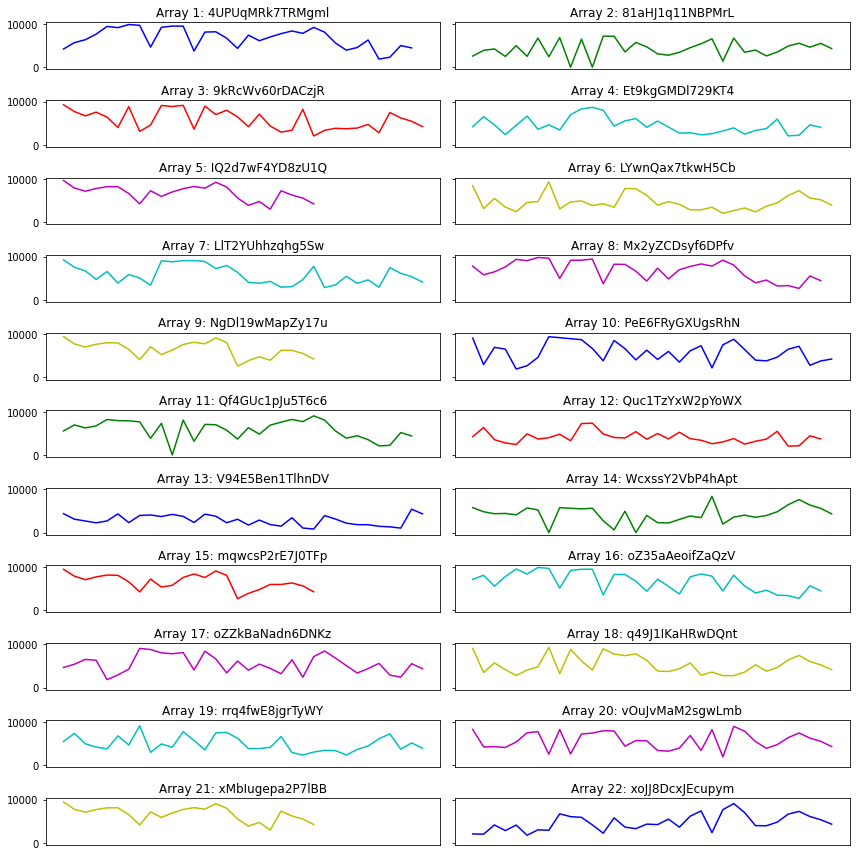

In [24]:
fig,ax = plt.subplots(11,2,sharex=True,sharey=True,figsize=(12,12))
colors = ['b','g','r','c','m','y','c','m','y','b','g','r','b','g','r','c','m','y','c','m','y','b','g']
def array_performance(data):
    for label,i in enumerate(data['Array_Source_Key'].unique()):
        a = i
        z = daily_total.loc[daily_total['Array_Source_Key'] == a]
        y = z['Daily_Yield_kW']
        x = z['Date']
        axs = ax.flatten()[label]
        axs.plot(x,y,color=colors[label])
        title = ('Array '+str(label+1) + ': ' + str(a))
        axs.set_title(title)
        axs.set_xticks([])
        fig.tight_layout()
    
array_performance(nashik)

These look very different from the arrays in the Gandikota plant. There are less large drop offs and it seems like the generation is a little more consistent for each indivisual array.

Let's take a look at the averages:

In [25]:
daily_averages = {}
for index, i in enumerate(daily_total['Array_Source_Key'].unique()):
    a = daily_total.loc[daily_total['Array_Source_Key'] == i]
    avg = (a['Total_Yield_kW'][-1] - a['Total_Yield_kW'][0])/((len(daily_total)/(len(daily_total['Array_Source_Key'].unique()))))
    daily_averages[index+1] = avg
daily_averages

{1: 6903.45584045584,
 2: 6388.4301994301995,
 3: 5875.190883190883,
 4: 4567.914529914529,
 5: 7329.447293447293,
 6: 4662.871794871795,
 7: 5857.923076923077,
 8: 6954.287749287749,
 9: 7016.777777777777,
 10: 5932.290598290598,
 11: 6859.581196581196,
 12: 4154.11396011396,
 13: 6268.683760683761,
 14: 6488.307692307692,
 15: 7068.330484330484,
 16: 6792.609686609687,
 17: 6235.840455840455,
 18: 5382.133903133903,
 19: 5068.806267806268,
 20: 6460.6980056980055,
 21: 7217.62962962963,
 22: 5924.831908831909}

Text(0.5, 1.0, 'Average Daily Power Generation')

Text(0, 0.5, 'Power (kW)')

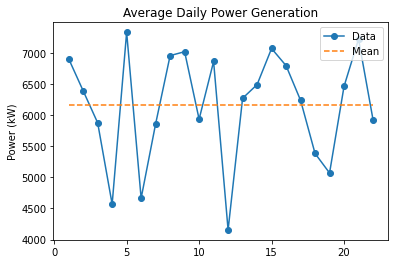

In [26]:
labels = []
sizes = []
for x, y in daily_averages.items():
    labels.append(x)
    sizes.append(y)
overall = sum(daily_averages.values())/22
mean = [overall]*22
#plt.plot(sizes,overall)
#plt.show()

fig,ax = plt.subplots()
x = np.arange(1,23,1)
y = sizes
data_line = ax.plot(x,y,label='Data', marker='o')

mean_line = ax.plot(x,mean, label='Mean', linestyle='--')
legend = ax.legend(loc='upper right')
plt.title('Average Daily Power Generation')
plt.ylabel('Power (kW)')
plt.show()

It looks like there's a much larger spread from array to array for the Nashik plant. In the Gandikota plant all of the arrays were close to average except for two, in this one the average values are all over the place.

## Creating a Plant-Wide Average for Each Variable<a id='Nashik_Average'></a>

In [27]:
# step 1: turn empty dictionary into df

nashik_averages = {}
num_arrays = 22
for times in nashik.index.unique():
    x = nashik.loc[nashik.index == times]
    y = x['DC_Power_kW'].sum()/num_arrays
    nashik_averages[times] = y
    
nashik_averages = pd.DataFrame.from_dict(nashik_averages, orient='index')
nashik_averages = nashik_averages.rename(columns={0:'DC_Power_kW'})

# step 2: add the other variables
ac = []
dy = []
at = []
mt = []
ir = []
for i,times in enumerate(nashik.index.unique()):
    a = 'AC_Power_kW'
    b = 'Daily_Yield_kW'
    c = 'Ambient_Temperature_C'
    d = 'Module_Temperature_C'
    e = 'Irradition'
    x = x = nashik.loc[nashik.index == times]
    ac.append(x[a].sum()/num_arrays)
    dy.append(x[b].sum()/num_arrays)
    at.append(x[c].sum()/num_arrays)
    mt.append(x[d].sum()/num_arrays)
    ir.append(x[e].sum()/num_arrays)

nashik_averages[a] = ac
nashik_averages[b] = dy
nashik_averages[c] = at
nashik_averages[d] = mt
nashik_averages[e] = ir

nashik_averages.head()

,DC_Power_kW,AC_Power_kW,Daily_Yield_kW,Ambient_Temperature_C,Module_Temperature_C,Irradition
2020-05-15 00:00:00,0.0,0.0,2222.724459,27.004764,25.060789,0.0
2020-05-15 00:15:00,0.0,0.0,1290.954545,26.880811,24.421869,0.0
2020-05-15 00:30:00,0.0,0.0,1290.954545,26.682055,24.427290,0.0
2020-05-15 00:45:00,0.0,0.0,1290.954545,26.500589,24.420678,0.0
2020-05-15 01:00:00,0.0,0.0,1205.272727,26.596148,25.088210,0.0


It looks array 12 is the biggest outlier so lets take a look at how that one compares to the average

<AxesSubplot:title={'center':'Array 12 Performance vs Solar Plant Average'}>

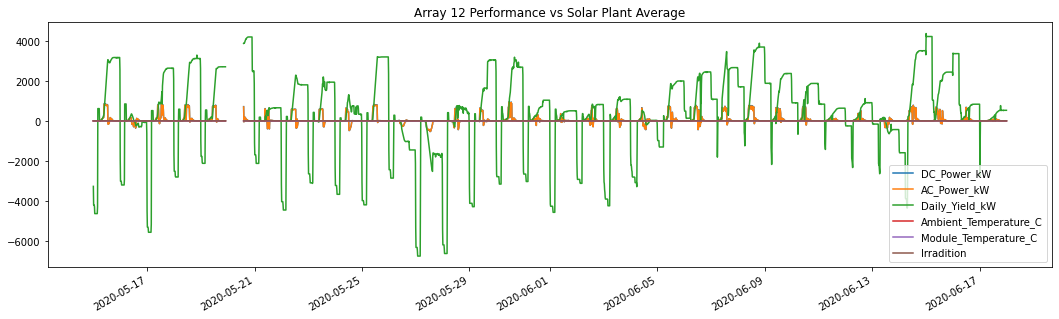

In [28]:
array_12 = nashik.loc[nashik['Array_Source_Key'] == nashik['Array_Source_Key'].iloc[11]]
array_12comp = array_12[['DC_Power_kW','AC_Power_kW','Daily_Yield_kW','Ambient_Temperature_C',
                       'Module_Temperature_C','Irradition']]
df_12 = nashik_averages - array_12comp
df_12.plot(title=('Array 12 Performance vs Solar Plant Average'),figsize=(18,5))

There are a lot of large drops in daily_yield, it seems like this array is regularly malfunctioning and should be replaced. We'll test this more later. 

For reference let's see what a more 'average' array looks like, Array 17 for example is very close to the average value.

<AxesSubplot:title={'center':'Array 17 Performance vs Solar Plant Average'}>

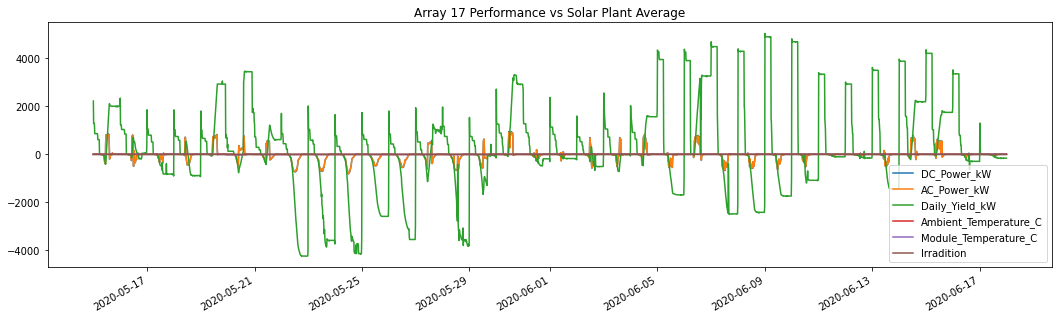

In [29]:
array_17 = nashik.loc[nashik['Array_Source_Key'] == nashik['Array_Source_Key'].iloc[16]]
array_17comp = array_17[['DC_Power_kW','AC_Power_kW','Daily_Yield_kW','Ambient_Temperature_C',
                       'Module_Temperature_C','Irradition']]
df_17 = nashik_averages - array_17comp
df_17.plot(title=('Array 17 Performance vs Solar Plant Average'),figsize=(18,5))

Array 17 has a fair share of drops as well but it looks like that it makes up for it with some very high daily yield days. 

We'll get a better idea of if any arrays have big issues when we get to the NOCT values

## Finding the Relationships in Weather Variables<a id='Nashik_Weather'></a>

Text(0.5, 1.0, 'Ambient Temperature vs Array Temperature')

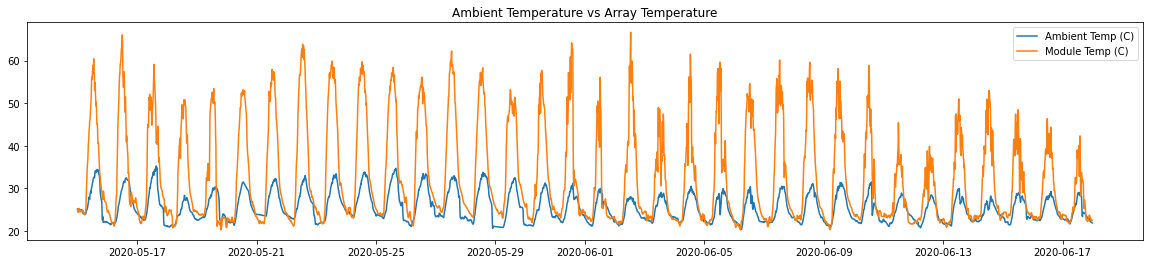

In [30]:
n_weather = nashik['Ambient_Temperature_C']
m_temp = nashik['Module_Temperature_C']
labels = ['Ambient Temp (C)','Module Temp (C)']
fig, ax = plt.subplots(1, 1, figsize = (20, 4))
plt.plot(g_weather)
plt.plot(m_temp)
plt.title('Ambient Temperature vs Array Temperature')
plt.legend(labels)
plt.show()

This looks very similar to the Gandikota relationships

Text(0.5, 1.0, 'Solar Irradiance vs Array Temperature')

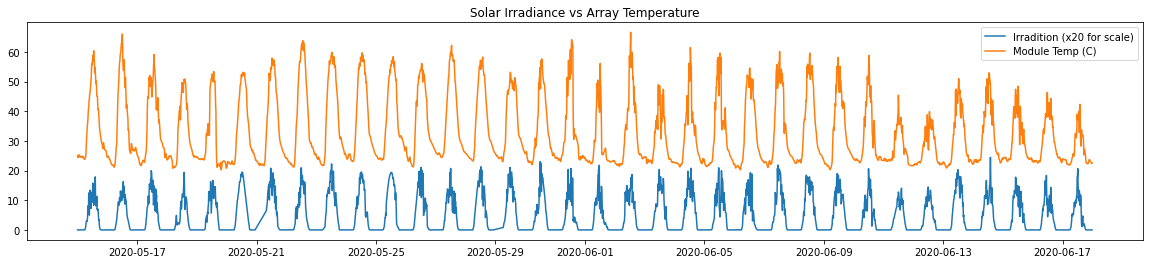

In [31]:
n_irradition = nashik['Irradition']
m_temp = nashik['Module_Temperature_C']
labels = ['Irradition (x20 for scale)','Module Temp (C)']
fig, ax = plt.subplots(1, 1, figsize = (20, 4))
plt.plot(g_irradition*20)
plt.plot(m_temp)
plt.title('Solar Irradiance vs Array Temperature')
plt.legend(labels)
plt.show()

Very similar results here as well

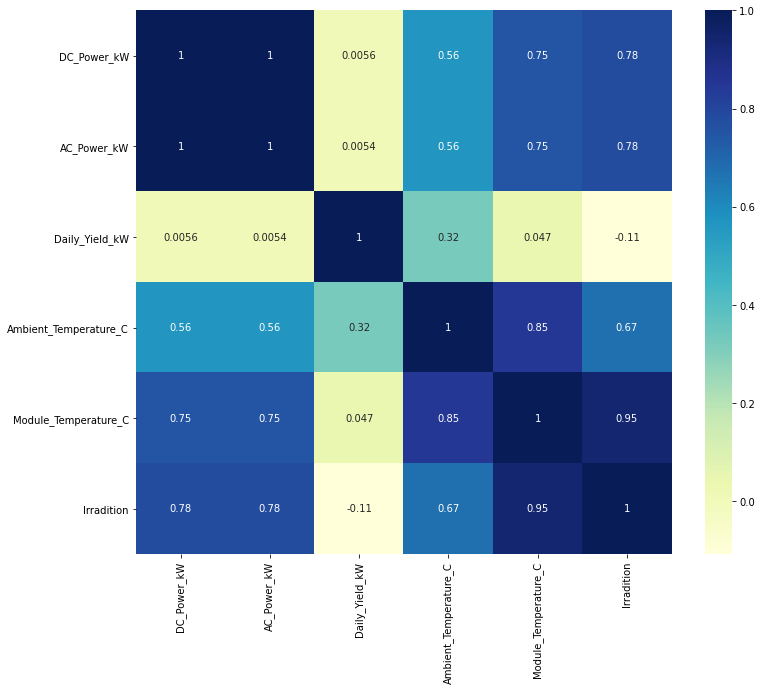

In [32]:
power_and_temps = nashik[['DC_Power_kW','AC_Power_kW','Daily_Yield_kW',
                             'Ambient_Temperature_C','Module_Temperature_C','Irradition']]
plt.subplots(figsize=(12,10))
sns.heatmap(power_and_temps.corr(),annot=True,cmap='YlGnBu');

While the correlation pattern appears to be the same, each value appears to be lower. This could be due to a different NOCT value, lets find out.

In [33]:
temp_data = nashik_averages[['Ambient_Temperature_C','Module_Temperature_C','Irradition']]

n_noct = []
for n in range(len(temp_data)):
    tc = temp_data['Module_Temperature_C'][n]
    ta = temp_data['Ambient_Temperature_C'][n]
    s = temp_data['Irradition'][n]
    if s > 0:
        x = (20*((s*1000)+4*ta - 4*tc))/(s*1000)
        n_noct.append(x)
n_noct = [x for x in n_noct if x < nashik['Module_Temperature_C'].max()]
np.mean(n_noct)

19.52677181323176

Wow, more than a whole degree higher than the Gandikota plant! It is still below the average of 25 degrees but it's slightly better.

## NOCT Values for Each Array<a id='Nashik_NOCT'></a>

In [34]:
array_noct = {}
values = []
def array_weather_data(data):
    for index,i in enumerate(data['Array_Source_Key'].unique()):
        weather = nashik.loc[nashik['Array_Source_Key'] == i]
        for n in range(len(weather)):
            global anoct
            global values
            tc = weather['Module_Temperature_C'][n]
            ta = weather['Ambient_Temperature_C'][n]
            s = weather['Irradition'][n]
            if s > 0:
                anoct = (20*((s*1000)+4*ta - 4*tc))/(s*1000)
                values.append(anoct)
        values = [x for x in values if x < nashik['Module_Temperature_C'].max()]
        array_noct['Array '+ str(index+1)] = np.mean(values)
array_weather_data(nashik)

In [35]:
array_noct

{'Array 1': 19.5375144782106,
 'Array 2': 19.532091782646084,
 'Array 3': 19.530307190556783,
 'Array 4': 19.532091782646088,
 'Array 5': 19.54797936136536,
 'Array 6': 19.544249573495726,
 'Array 7': 19.541635487604097,
 'Array 8': 19.541108173658795,
 'Array 9': 19.54920290144277,
 'Array 10': 19.546814310718183,
 'Array 11': 19.545934666388124,
 'Array 12': 19.545207048367423,
 'Array 13': 19.543714684428284,
 'Array 14': 19.542445844669704,
 'Array 15': 19.54720213831923,
 'Array 16': 19.54657096866784,
 'Array 17': 19.545337989410353,
 'Array 18': 19.544249573495726,
 'Array 19': 19.543281704392513,
 'Array 20': 19.542415406299135,
 'Array 21': 19.545801135134276,
 'Array 22': 19.54488546531619}

That confirms it, there doesn't seem to be any issues from array to array in the Nashik plant either

## Conclusion<a id='Conclusion'></a>

Now that we have a solid understanding of the individual arrays in both plants, we can create more accurate parameters and models in the next steps for analysis. There are several variables involved when calculating how much power a solar plant will predict in a given time, so it's great that we now have a better understanding of how each one is related.

To recap, in this notebook, we:

- Compared the daily output values from each of the 22 solar arrays
- Inspected any outliers that strayed far from the average daily output
- Found the relationships between Ambient Temperature, Module Temperature, and Solar Irradiance
- Calculated the Nominal Operating Cell Temperature for each array
- Confirmed the functionality of each array by comparing individual NOCT values to the plant's average

Now that we know all this, the last step for our prediction model is to calculate how much power our plant will generate with certain weather conditions. We'll figure this out in the next notebook and have a first look at our model as well

In [44]:
# save new datasets for step 3
gandikota_averages.to_csv(r'Data\gandikota_averages.csv')
nashik_averages.to_csv(r'Data\nashik_averages.csv')

gand_noct = np.mean(g_noct)
nash_noct = np.mean(n_noct)

df = {'gandikota':gand_noct,'nashik':nash_noct}

noct_df = pd.DataFrame(df,index=['gandikota','nashik'])

noct_df.to_csv(r'Data\noct_df.csv')